**STEP-1 :Business Problem Understanding**

- What the is the ralationship between each advertising channel(TV,Radio,Newspaper)and sales?

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

**Step-2:Data understanding
- 2.1.load Data & Understand every variable

In [2]:
df = pd.read_csv(r'C:\Users\sahur\Downloads\DATASET OF DATA SCIENCE SRK SIR\Advertising.csv')
df.head()


,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


**2.2 Data Understanding**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

**Exploratory Data Analysis**

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


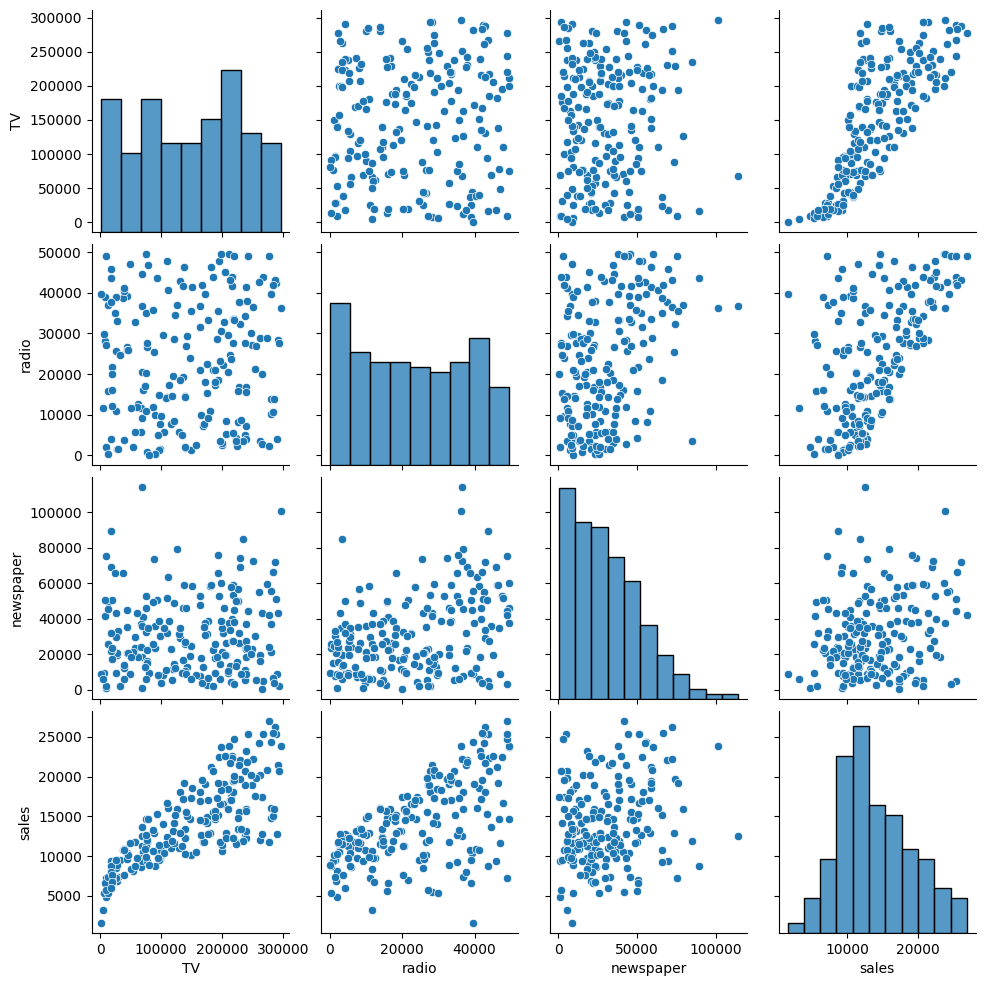

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


**Step-3:Data Preprocessing**

- Data Cleaning

In [8]:
# for this data set ,no data cleanig required

**Data Wrangling**

In [9]:
# for this dataset, no encoding required

**X & Y**

In [10]:
x = df[['TV','radio','newspaper']]

y = df['sales']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = True)

**Step-4:Modeling - Polynomial Regression**

In [ ]:
# data preprocessing on train data 
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree = 2)
x_train_poly = pd.DataFrame(polynomial_converter.fit_transform(x_train))
x_train_poly 

- This code is using the PolynomialFeatures class from scikit-learn to generate polynomial and interaction features 
from the original input features (x_train). Let's go step by step to explain what each line does and what the overall goal is:

- 🔧 What is PolynomialFeatures?
- In machine learning, especially in regression problems, sometimes the relationship between the input features (X) and the target (y)
is non-linear. To capture that non-linearity, we can add polynomial terms (like 𝑥2 , x 3 , or interaction terms like 𝑥1⋅𝑥2) to our dataset.

- This process is called polynomial feature expansion, and it's used to transform the data so that a linear model (like LinearRegression) can fit non-linear relationships.

- 📜 Code Breakdown:

**from sklearn.preprocessing import PolynomialFeatures**

- This imports the PolynomialFeatures class from sklearn.preprocessing. This class is used to generate a new feature matrix that includes polynomial terms up to a specified degree.

**polynomial_converter = PolynomialFeatures(degree=2)**

- This creates an instance of PolynomialFeatures.

- degree=2 means you want to create quadratic features.

- For example, if your original data has features 
- [𝑥1,𝑥2], this will create:
- [1,x 1,x 2,x 12,x 1⋅x 2,x 22]
 (including interaction terms and squares of each feature).

**x_train_poly = pd.DataFrame(polynomial_converter.fit_transform(x_train))**

- .fit_transform(x_train):

- fit learns how to expand the features based on the input structure.

- transform actually applies that expansion and gives you the new array with all the polynomial terms.

- The result is a new NumPy array with more columns than the original x_train.

- pd.DataFrame(...) converts the result into a Pandas DataFrame, so it's easier to visualize and use later.

- 🧠 Example:
- If your original x_train looked like:

|x1|	x2|
|--|------|
|2|  	3|
- After applying PolynomialFeatures(degree=2), the output will be:

|1|	x1|	x2|	x1²|	x1·x2|	x2²|
|-|--|---|----|---------|-----|
|1|	2|	3|	4	|6|	9|

- ✅ What does this code do overall?
It:

- Takes your original x_train features.

- Generates new features including:

- Original features

- Their squares

- Interaction terms (product of different features)

- Returns a new DataFrame with the expanded features.

- This is very useful when you're trying to train a linear model on data that actually has a non-linear relationship.

In [14]:

# Modelling on train data 
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_poly,y_train)

# prediction on train data 
ypred_train = model.predict(x_train_poly)

# Evaluation on train data 
from sklearn.metrics import mean_squared_error, r2_score
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,ypred_train)))
print('Train R2:',r2_score(y_train,ypred_train))

# cross validation on train data 
from sklearn.model_selection import cross_val_score
print('cross validataion score :',cross_val_score(model,x_train_poly,y_train,cv = 5).mean())

Train RMSE: 639.2961320364171
Train R2: 0.9859022932869599
cross validataion score : 0.98113242896037


In [16]:
# data preprocessing on test data 
x_test_poly = pd.DataFrame(polynomial_converter.transform(x_test))

# prediction on test data 
ypred_test = model.predict(x_test_poly)

# evaluation on test data 
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,ypred_test)))
print('Test R2:',r2_score(y_test,ypred_test))

Test RMSE: 481.4117164337585
Test R2: 0.9875226217708805


**Comparison with Linear Regression**

**Result on the Test set(Note:use the same Random Split to fairly compare!)

- Multiple Linear Regression 
  - R2:0.92
- Polynomial 2-degree
   - R2:0.98

### Hyperparameter Tunning

**Choosing the best polynomial degree for given dataset**


In [19]:
train_r2 =[]
test_r2 = []

for i in range(1,10):
    # preprocessing 
    polynomial_converter = PolynomialFeatures(degree = i)
    x_train_poly = pd.DataFrame(polynomial_converter.fit_transform(x_train))

    # modelling
    model = LinearRegression()
    model.fit(x_train_poly,y_train)
    
    # prediction & evaluation on train data 
    train_pred = model.predict(x_train_poly)
    train_r2.append(model.score(x_train_poly,y_train))
   
    # prediction on test data 
    x_test_poly = pd.DataFrame(polynomial_converter.transform(x_test))

    # prediction & evaluation on train data 
    test_pred = model.predict(x_test_poly)
    test_r2.append(model.score(x_test_poly,y_test))

In [20]:
train_r2

[0.8959372632325174,
 0.9859022932869599,
 0.9920846871335233,
 0.9158958850157827,
 0.9813256152580051,
 0.969345705184392,
 -1.3105626315081023,
 0.9556146888607637,
 0.9547082564696598]

In [21]:
test_r2

[0.8927605914615385,
 0.9875226217708805,
 0.9901867955166157,
 0.2659582230278539,
 -2.3033550169870973,
 -120.47953994228195,
 -62208.99934996655,
 -69093.49410974135,
 -1494084.5310313862]

### Final Polynomial Model with best parameters

In [31]:
# preprocessing 
final_poly_converter = PolynomialFeatures(degree = 3)
x_train_poly = pd.DataFrame(final_poly_converter.fit_transform(x_train))

# build the final model
final_model  = LinearRegression()
final_model.fit(x_train_poly,y_train)

# prediction & evaluation on train data 
train_pred = final_model.predict(x_train_poly)
print('Train R2:',final_model.score(x_train_poly,y_train))
print('Cross validation score:',cross_val_score(model,x_train_poly,y_train,cv=5).mean())

# preprocessing + prediction +evaluation on test data
x_test_poly = pd.DataFrame(final_poly_converter.transform(x_test))
test_pred = final_model.predict(x_test_poly)
print('Test R2:',final_model.score(x_test_poly,y_test))

Train R2: 0.9920846871335233
Cross validation score: 0.985160737923399
Test R2: 0.9901867955166157


### prediction on New Data 

**Our next ad compaign will have a total spend of 149k on TV ,22k on Radio,and 12k on 
Newspaper Ads,how many units could we expect to sell as a result of this**


In [35]:
test_df= pd.DataFrame({'TV':[149000],'radio':[22000],'newspaper':[12000]})
print(test_df)

# transformation
transformed_data = final_poly_converter.transform(test_df)

# predict 
print("\n Expected Sales for given spend:",final_model.predict(transformed_data)[0])

       TV  radio  newspaper
0  149000  22000      12000

 Expected Sales for given spend: 14628.317280810536
